In [42]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import math

In [43]:
audio_file = "music_file.mp3"
y,sr = librosa.load(audio_file,sr=44100)

In [44]:
# Compute spectrogram
D = librosa.stft(y)
D.shape

(1025, 6687)

In [63]:
# Convert to decibels
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
S_db.shape
for i in S_db:
    print(i)

[-65.262024 -60.074154 -59.214596 ... -58.130257 -58.704605 -63.59887 ]
[-67.110275 -64.63256  -65.2169   ... -64.19946  -63.28414  -65.46188 ]
[-72.74071  -80.       -80.       ... -80.       -79.74246  -71.175446]
[-78.67056 -80.      -80.      ... -80.      -80.      -77.57179]
[-80.       -80.       -80.       ... -80.       -80.       -79.792435]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.

In [46]:
times = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sr)
times.shape

(6687,)

In [47]:
n_fft = 8192
freqs = librosa.fft_frequencies(sr=sr,n_fft=n_fft)
freqs.shape

(4097,)

In [69]:
max_freq_index = np.argmax(S_db, axis=0)
max_freqs = freqs[max_freq_index]
max_freqs.shape

(6687,)

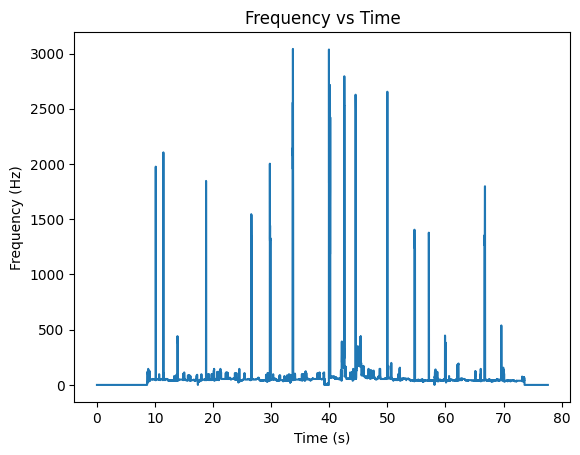

In [49]:
plt.plot(times, max_freqs)
plt.title('Frequency vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [50]:
# Calculate the duration of each frame in milliseconds
hop_length = 512
frame_duration_ms = hop_length / sr * 1000

print("Duration of each frame: {:.2f} ms".format(frame_duration_ms))

Duration of each frame: 11.61 ms


In [51]:
def freq_to_note(freq):
        if freq==0:
            return None,None
        """
        Returns the note and octave corresponding to a given frequency.
        """
        notes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
#         notes = ["Sa", "Sa#", "Re", "Re#", "Ga", "Ma", "Ma#", "Pa", "Pa#", "Dha", "Dha#", "Ni"]
        A4_freq = 440.0
        A4_note = 9
        A4_octave = 4
        half_steps = round(12 * math.log2(freq / A4_freq))
        note = notes[(A4_note + half_steps) % 12]
        octave = A4_octave + ((A4_note + half_steps) // 12)
        return note,octave

In [52]:
def getNotes():
    final = {}
    prev = ""
    prev_octave=0
    prev_time = 0
    for i in range(len(times)):
        note,octave = freq_to_note(max_freqs[i])
        if note==None: continue
        if note==prev: continue
#         if prev_octave!=0 and abs(prev_octave-octave)>=2: continue
        final[str(int(times[i]*1000))] = prev+str(prev_octave)
        prev = note
        prev_octave = octave
    return final

In [55]:
notes = getNotes()
f = open("Notes.txt","w")
f.write("{")
for i in notes:
    f.write("'"+i+"'"+":"+"'"+notes[i]+"'"+',\n')
f.write("}")
f.close()

